In [22]:
using DifferentialEquations
using SpecialFunctions
using Plots
using XLSX

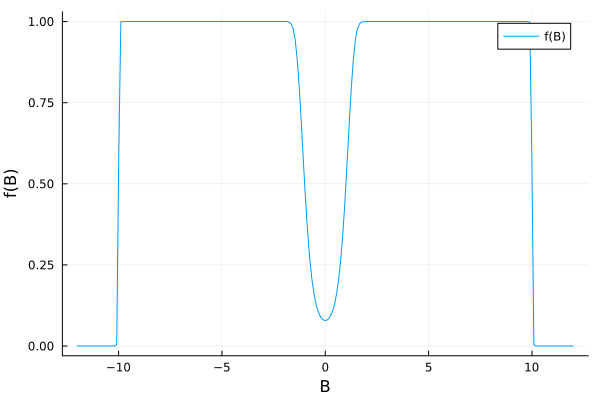

In [31]:
# BOX-SHAPED FUNCTION FOR THE MAGNETIC FIELD RANGE 

# Define limits
B_min = 1
B_max = 10

# Define the function
function f(B)
    return 1 / 4 * (1 .+ erf.(B .^ 2 .- B_min ^ 2)) .* (1 .- erf.(B .^ 2 .- B_max ^ 2))
end

# Plot (range [-12, 12])
B_values = range(-12, stop = 12, length = 240)
f_values = f(B_values)
plot(B_values, f_values, xlabel = "B", ylabel = "f(B)", label = "f(B)")

##############################################################

# DIMENSION OF THE MAGNETIC FIELD???

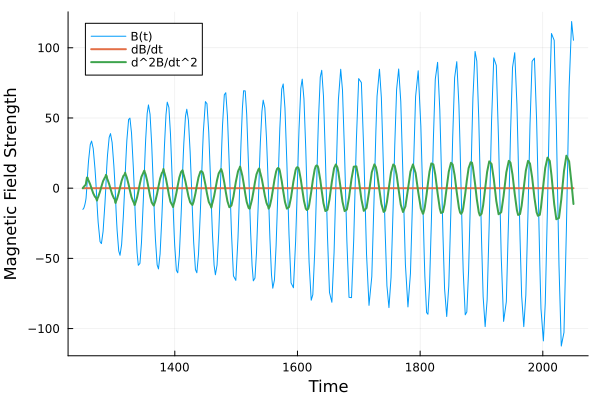

In [30]:
# DDE PROBLEM WITHOUT NOISE AND PERIODIC MODULATION

# Define parameters
N = 8.4
q = 0.82
tau = 5
p = [N, q, tau]

# Define initial conditions
B0 = [-15, 0, 0]
tspan = (1250, 2050.0)
h(p, t) = [0.0, 0.0, 0.0]

# Define the function for the DDE
function MagneticField(du, u, h, p, t)
  N, q, tau = p

  B = u[1]
  dB = u[2]
  ddB = u[3]

  du[1] = ddB
  du[2] = -2 * dB
  du[3] = (- B - N * h(p, t - q)[1] * f(h(p, t - q)[1])) / (tau^2)
end

# Define and solve the DDE problem
prob = DDEProblem(MagneticField, B0, h, tspan, p)
sol = solve(prob, MethodOfSteps(Tsit5()))

# Plot 
plot(sol.t, sol[1, :], label = "B(t)", xlabel = "Time", ylabel = "Magnetic Field Strength", linewidth = 1)
#plot!(sol.t, sol[2, :], label="dB/dt", linewidth=1)
#plot!(sol.t, sol[3, :], label="d^2B/dt^2", linewidth=1)

######################################

# DIMENSIONS??? 
# WHY THE PERIOD DOESN'T MATCH?
# WHY IS NOT CONSTANT?
# WHY IT GOES OVER 100?

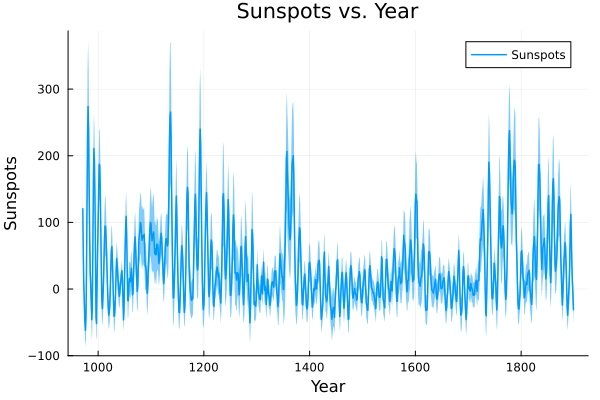

In [32]:
# PLOTTING OF THE SUNSPOT RECORDS FROM 971 TO 1899 (AD)

# Initialize vectors
years = Vector{Float64}()
sunsopts_num = Vector{Float64}()
sunspots_err = Vector{Float64}()

# Read from xlsx file the data
XLSX.openxlsx("SN Usoskin Brehm.xlsx") do file
  sheet = file["Data"]

  for row in XLSX.eachrow(sheet)
    year = row[2]
    sun_num = row[7]
    sun_err = row[8]
    
    # Check if the rows values are numeric (and not empty nor strings)
    if isa(year, Number) && isa(sun_num, Number) && isa(sun_err, Number)
      push!(years, year)
      push!(sunsopts_num, sun_num)
      push!(sunspots_err, sun_err)
    end
  end
end

plot(years, sunsopts_num, ribbon = sunspots_err, xlabel = "Year", ylabel = "Sunspots", 
    title = "Sunspots vs. Year", label = "Sunspots", linewidth = 1.5)